# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the datasets
df_08 = pd.read_csv('fuel-economy-datasets/all_alpha_08.csv', sep=',')
df_18 = pd.read_csv('fuel-economy-datasets/all_alpha_18.csv', sep=',')

 Verify that the data was read and saved in the dataframes successfully

In [3]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


# Assessing the 2008 Dataset

## Number of samples & columns

In [5]:
df_08.shape

(2404, 18)

## Duplicate rows

In [6]:
df_08.duplicated().sum()

25

## Datatypes of each column

In [7]:
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

## Features with missing values

In [8]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

## Number of non-null unique values for each feature

### For the 2008 dataset

In [9]:
columns_08 = df_08.columns
for col in columns_08:
    print(col, "has", df_08[col].nunique(),"unique entries")

Model has 436 unique entries
Displ has 47 unique entries
Cyl has 8 unique entries
Trans has 14 unique entries
Drive has 2 unique entries
Fuel has 5 unique entries
Sales Area has 3 unique entries
Stnd has 12 unique entries
Underhood ID has 343 unique entries
Veh Class has 9 unique entries
Air Pollution Score has 13 unique entries
FE Calc Appr has 2 unique entries
City MPG has 39 unique entries
Hwy MPG has 43 unique entries
Cmb MPG has 38 unique entries
Unadj Cmb MPG has 721 unique entries
Greenhouse Gas Score has 20 unique entries
SmartWay has 2 unique entries


# Assessing the 2018 Dataset

## Number of samples & columns

In [10]:
df_18.shape

(1611, 18)

## Duplicate rows

In [11]:
df_18.duplicated().sum()

0

## Datatypes of each column

In [12]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

## Features with missing values

In [13]:
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

## Number of non-null unique values for each feature

In [14]:
columns_18 = df_18.columns
for col in columns_18:
    print(col, "has", df_18[col].nunique(),"unique entries")

Model has 367 unique entries
Displ has 36 unique entries
Cyl has 7 unique entries
Trans has 26 unique entries
Drive has 2 unique entries
Fuel has 5 unique entries
Cert Region has 2 unique entries
Stnd has 19 unique entries
Stnd Description has 19 unique entries
Underhood ID has 230 unique entries
Veh Class has 9 unique entries
Air Pollution Score has 6 unique entries
City MPG has 58 unique entries
Hwy MPG has 62 unique entries
Cmb MPG has 57 unique entries
Greenhouse Gas Score has 10 unique entries
SmartWay has 3 unique entries
Comb CO2 has 299 unique entries


# fuel Type comparison betwee 2008 and 2018

In [15]:
fuels_2008 = df_08['Fuel'].unique()
fuels_2008

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [16]:
fuels_2018 = df_18['Fuel'].unique()
fuels_2018

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

In [17]:
all_fuels = list(set().union(fuels_2008,fuels_2018))
all_fuels

['CNG',
 'Gasoline/Electricity',
 'Ethanol/Gas',
 'ethanol',
 'ethanol/gas',
 'Electricity',
 'Diesel',
 'Gasoline',
 'diesel']

### fuels in both years

In [18]:
both_years = []
only_2008 = []
only_2018 = []
for fuel in all_fuels:
    if fuel in fuels_2008 and fuel in fuels_2018:
        both_years.append(fuel)
    elif fuel in fuels_2008 and fuel not in fuels_2018:
        only_2008.append(fuel)
    elif fuel in fuels_2018 and fuel not in fuels_2008:
        only_2018.append(fuel)

In [19]:
print(both_years)

['Gasoline']


In [20]:
print(only_2008)

['CNG', 'ethanol', 'ethanol/gas', 'diesel']


In [21]:
print(only_2018)

['Gasoline/Electricity', 'Ethanol/Gas', 'Electricity', 'Diesel']


# Cleaning Column & Column Labels

In [22]:
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [23]:
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

## Drop Extraneous Columns

### For the 2008 dataset, we will not be needing the following columns: `'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'`

In [24]:
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis = 1, inplace = True)

# Verify that the columns were dropped as needed
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

### For the 2008 dataset, we will not be needing the following columns: `'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'`

In [25]:
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis = 1, inplace = True)

# Verify that the columns were dropped as needed
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

## Renaming Columns

### Note that some columns in the two datasets have been named differently. For Instance, we have `Sales Area` in the 2008 dataset and `Cert Region` in the 2018 dataset. Change the 2008 dataset as required

In [26]:
df_08.rename(columns={'Sales Area':'Cert Region'}, inplace = True)

# Verify that the column header was changed successfully
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

## Replace the spaces between column names with underscores and change all the characters to lowercase

#### For the 2008 dataset

In [27]:
df_08.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace = True)

# verify that the column names were changed successfully
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

#### For the 2018 dataset

In [28]:
df_18.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace = True)

# verify that the column names were changed successfully
df_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

### Confirm that the column labels for the two datasets are identical

In [29]:
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [30]:
# The check above can also be done as follows:
(df_08.columns==df_18.columns).all()

True

## Save the datasets with the cleaned data in new files

In [31]:
df_08.to_csv('fuel-economy-datasets/data_08_v1.csv', index=False)
df_18.to_csv('fuel-economy-datasets/data_18_v1.csv', index=False)

#################################################################################################################

# Load the datasets with the cleaned column names

In [32]:
new_df_08 = pd.read_csv('fuel-economy-datasets/data_08_v1.csv')
new_df_18 = pd.read_csv('fuel-economy-datasets/data_18_v1.csv')

In [33]:
new_df_08.shape

(2404, 14)

In [34]:
new_df_18.shape

(1611, 14)

# Filter by Certification Region

## Filter the datasets for rows following California standards

In [35]:
# The 2008 Dataset
df_08_CA = df_08.query('cert_region == "CA"')
# The 2018 Dataset
df_18_CA = df_18.query('cert_region == "CA"')

In [36]:
# Confirm certification region is only California (2008)
df_08_CA['cert_region'].unique()

array(['CA'], dtype=object)

In [37]:
# Confirm certification region is only California (2018)
df_18_CA['cert_region'].unique()

array(['CA'], dtype=object)

# Drop the certification region in both datasets

In [38]:
df_08_CA.drop('cert_region', axis = 1, inplace = True)
df_18_CA.drop('cert_region', axis = 1, inplace = True)

/tmp/ipykernel_10834/531422920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08_CA.drop('cert_region', axis = 1, inplace = True)
/tmp/ipykernel_10834/531422920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18_CA.drop('cert_region', axis = 1, inplace = True)


In [39]:
df_08_CA.shape

(1084, 13)

In [40]:
df_18_CA.shape

(798, 13)

# Drop Rows with Missing Values

## Check missing value count for each feature in 2008 dataset

In [41]:
df_08_CA.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

### Drop the rows with missing values

In [42]:
df_08_CA.dropna(inplace = True)

/tmp/ipykernel_10834/2769436724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08_CA.dropna(inplace = True)


In [43]:
# Verify that the rows with null values were dropped.
df_08_CA.isnull().sum().any()

False

## Check missing value count for each feature in 2008 dataset

In [44]:
df_18_CA.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

### Drop the rows with missing values

In [45]:
df_18_CA.dropna(inplace=True)

/tmp/ipykernel_10834/3541200519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18_CA.dropna(inplace=True)


In [46]:
# Verify that the rows with null values were dropped.
df_18_CA.isnull().sum().any()

False

# Dealing with Duplicates

## check the number of duplicates in each dataset

In [47]:
print(df_08_CA.duplicated().sum())
print(df_18_CA.duplicated().sum())

23
3


## Drop the duplicates in both datasets

In [48]:
df_08_CA.drop_duplicates(inplace = True)
df_18_CA.drop_duplicates(inplace = True)

/tmp/ipykernel_10834/2824582573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08_CA.drop_duplicates(inplace = True)
/tmp/ipykernel_10834/2824582573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18_CA.drop_duplicates(inplace = True)


In [49]:
# Verify that the duplicates were droped
print(df_08_CA.duplicated().sum())
print(df_18_CA.duplicated().sum())

0
0


# Save the cleaned data in new files

In [50]:
df_08_CA.to_csv('fuel-economy-datasets/data_08_v2.csv', index=False)
df_18_CA.to_csv('fuel-economy-datasets/data_18_v2.csv', index=False)

###################################################################################################################

# Load the New v2 Datasets

In [51]:
df_08_CA_New = pd.read_csv('fuel-economy-datasets/data_08_v2.csv')
df_18_CA_New = pd.read_csv('fuel-economy-datasets/data_18_v2.csv')

# Assess the datasets to identify more data cleaning issues

In [52]:
df_08_CA_New.head(10)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
2,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
3,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
4,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes
5,ACURA TL,3.5,(6 cyl),Man-6,2WD,Gasoline,midsize car,7,18,27,21,6,yes
6,ACURA TSX,2.4,(4 cyl),Man-6,2WD,Gasoline,small car,6,19,28,22,6,no
7,ACURA TSX,2.4,(4 cyl),Auto-S5,2WD,Gasoline,small car,6,20,28,23,7,yes
8,ASTON MARTIN DB9,5.9,(12 cyl),Man-6,2WD,Gasoline,small car,6,10,16,12,0,no
9,ASTON MARTIN DB9,5.9,(12 cyl),Auto-S6,2WD,Gasoline,small car,6,11,18,13,1,no


In [53]:
df_18_CA_New.head(10)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
2,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
3,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
4,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No
5,ACURA TLX AWD A-SPEC,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,20,29,23,5,No
6,ACURA TLX FWD A-SPEC,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,30,23,5,No
7,ALFA ROMEO 4C,1.8,4.0,AutoMan-6,2WD,Gasoline,small car,1,24,34,28,6,No
8,ALFA ROMEO Giulia,2.9,6.0,Auto-8,2WD,Gasoline,midsize car,3,17,24,20,4,No
9,AUDI A3,2.0,4.0,AMS-6,4WD,Gasoline,small car,7,24,31,27,6,No


In [54]:
df_08_CA_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 986 non-null    object 
 1   displ                 986 non-null    float64
 2   cyl                   986 non-null    object 
 3   trans                 986 non-null    object 
 4   drive                 986 non-null    object 
 5   fuel                  986 non-null    object 
 6   veh_class             986 non-null    object 
 7   air_pollution_score   986 non-null    object 
 8   city_mpg              986 non-null    object 
 9   hwy_mpg               986 non-null    object 
 10  cmb_mpg               986 non-null    object 
 11  greenhouse_gas_score  986 non-null    object 
 12  smartway              986 non-null    object 
dtypes: float64(1), object(12)
memory usage: 100.3+ KB


In [55]:
df_18_CA_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 794 non-null    object 
 1   displ                 794 non-null    float64
 2   cyl                   794 non-null    float64
 3   trans                 794 non-null    object 
 4   drive                 794 non-null    object 
 5   fuel                  794 non-null    object 
 6   veh_class             794 non-null    object 
 7   air_pollution_score   794 non-null    int64  
 8   city_mpg              794 non-null    object 
 9   hwy_mpg               794 non-null    object 
 10  cmb_mpg               794 non-null    object 
 11  greenhouse_gas_score  794 non-null    int64  
 12  smartway              794 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 80.8+ KB


## More Cleaning recommendations

- Extract int values from the strings in the 2008 `cyl` column
- Convert floats to ints in the 2018 *`cyl` column*
- Convert strings to floats in the 2008 *`air_pollution_score`* column
- Convert ints to floats in the 2018 *`air_pollution_score`* column
- Convert strings to floats in the `city_mpg`, `hwy_mpg`, `cmb_mpg` columns in both datasets
- Convert strings to ints in the 2008 `greenhouse_gas_score` column

### Fixing `cyl` datatypes

#### 1. 2008 dataset: Extracting int from string

In [56]:
# Check the value counts for the 2008 cyl column
df_08_CA_New['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [57]:
df_08_CA_New['cyl'] = df_08_CA_New.cyl.str.extract('(\d+)').astype(int)

In [58]:
# verify that the changes have been made
df_08_CA_New.cyl.value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

#### 2. 2018 dataset: Convert the datatype from float to ints

In [59]:
df_18_CA_New.cyl=df_18_CA_New.cyl.astype(int)

In [60]:
# verify that the change has been made
df_18_CA_New.cyl.info()

<class 'pandas.core.series.Series'>
RangeIndex: 794 entries, 0 to 793
Series name: cyl
Non-Null Count  Dtype
--------------  -----
794 non-null    int64
dtypes: int64(1)
memory usage: 6.3 KB


##### Save the cleaned data in new files

In [61]:
df_08_CA_New.to_csv('fuel-economy-datasets/data_08_v3.csv', index=False)
df_18_CA_New.to_csv('fuel-economy-datasets/data_18_v3.csv', index=False)

##################################################################################################################

### Fixing `air_pollution_score` datatypes

In [62]:
df_08_CA_New = pd.read_csv('fuel-economy-datasets/data_08_v3.csv')
df_18_CA_New = pd.read_csv('fuel-economy-datasets/data_18_v3.csv')

In [63]:
df_18_CA_New.shape

(794, 13)

### For the 2008 dataset

#### Use pandas `astype()`funtion to change the datatype of `air_pollution_score` in the 2008 dataset to float

In [64]:
# df_08_CA_New.air_pollution_score = df_08_CA_New.air_pollution_score.astype(float)

This fails with a `valueerror` because 6/4 cannot be converted to type float. If the conversion to go through, we need to get rid of the `/` symbol fits

#### Figuring it out

In [65]:
df_08_CA_New[df_08_CA_New.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


Based on the information presented in the data documentation, these fractions are not intended to be rational numbers. `If a vehicle uses more than two types of fuel, consumption estimates are given for both types`. We can therefore separate these fields for the individual fuel type.
Suppose that the vehicles that use more than one fuel are `hybrid vehicles (hb)`

In [66]:
hb_08 = df_08_CA_New[df_08_CA_New.fuel.str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


#### Split this entry into two fields, one for ethanol fuel and one for gas fuel

#### Step 1: Make two copies of the dataframe that needs spliting

In [67]:
df1 = hb_08.copy()
df2 = hb_08.copy()

#### Step 2: Split the respective collumns and assign the entry to the left of the `/` to `df1` and the entry to the right of the `/` to `df2`

- The columns that needs spliting are: `fuel`, `air_pollution_score`, `city_mpg`, `hwy_mpg`, `cmb_mpg`, `greenhouse_gas_score`

In [68]:
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
for col in split_columns:
    df1[col] = df1[col].apply(lambda x: x.split('/')[0])
    df2[col] = df2[col].apply(lambda x: x.split('/')[1])

In [69]:
# verify that the columns have been split
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [70]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


#### Step 3: Combine the two dataframes

In [71]:
# Using `.append`
#new_dataframe_08 = df1.append(df2)
#############or##############

# using .concat
new_dataframe_08 = pd.concat([df1,df2], ignore_index=True)
new_dataframe_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


#### Step 4: Drop the old unwanted columns from the original dataset

In [72]:
df_08_CA_New.drop(hb_08.index, inplace=True)

#### Step 5: Combine the original dataset with the dataset with the separated columns

In [73]:
df_08_CA_New=pd.concat([df_08_CA_New, new_dataframe_08], ignore_index=False)

In [74]:
# Verify that the '/' has been eliminated in the dataset
df_08_CA_New[df_08_CA_New.fuel.str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


#### We can now use pandas `astype()` funtion to change the datatype of `air_pollution_score` in the 2008 dataset to float

In [75]:
df_08_CA_New.air_pollution_score = df_08_CA_New.air_pollution_score.astype(float)

### For the 2018 dataset

In [76]:
df_18_CA_New.air_pollution_score = df_18_CA_New.air_pollution_score.astype(float)

### Check if the 2018 dataset has a similar issue with fuel-related data

In [77]:
hb_18 = df_18_CA_New[df_18_CA_New.fuel.str.contains('/')]

We need to separate the columns that hold data two sets of data like we did with the 2008 dataset

#### Step 1: Create two copies of the dataset

In [78]:
df_1b = hb_18.copy()
df_2b = hb_18.copy()

#### Step 2: Split the respective collumns and assign the entry to the left of the `/` to `df1b` and the entry to the right of the `/` to `df2b`

In [79]:
edit_column = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
for col in edit_column:
    df_1b[col] = df_1b[col].apply(lambda x: x.split('/')[0])
    df_2b[col] = df_2b[col].apply(lambda x: x.split('/')[1])

In [80]:
df_1b.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3.0,28,34,30,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7.0,27,31,29,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7.0,27,31,28,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3.0,25,29,27,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5.0,14,20,16,4,No


In [81]:
df_2b.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,small car,3.0,66,78,71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,small car,7.0,70,75,72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,small car,7.0,66,68,67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,large car,3.0,62,68,64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Gas,large car,5.0,18,28,22,4,No


#### Step 3: combine the two datasets

In [82]:
new_data = pd.concat([df_1b, df_2b])
new_data.shape

(76, 13)

In [83]:
print(df_1b.shape)
print(df_2b.shape)

(38, 13)
(38, 13)


#### Step 4: Drop the columns containing the '/' from the original dataframe

In [84]:
df_18_CA_New.shape

(794, 13)

In [85]:
df_18_CA_New.drop(hb_18.index, inplace = True)

In [86]:
df_18_CA_New.shape

(756, 13)

#### Step 5: Combine the original dataset with the cleaned columns

In [87]:
df_18_CA_New = pd.concat([df_18_CA_New, new_data])

In [88]:
#### Verify that the data has been corrected
df_18_CA_New[df_18_CA_New.fuel.str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [89]:
df_08_CA_New.shape

(987, 13)

In [90]:
df_18_CA_New.shape

(832, 13)

# Save the cleaned datasets to new workbooks

In [91]:
df_08_CA_New.to_csv('fuel-economy-datasets/data_08_v4.csv', index=False)
df_18_CA_New.to_csv('fuel-economy-datasets/data_18_v4.csv', index=False)

#################################################################################################################

# Fix `City_mpg`, `hwy_mpg`, `cmb_mpg` datatypes

In [92]:
# Load the previously cleaned dataset
df_08_CA_New = pd.read_csv('fuel-economy-datasets/data_08_v4.csv')
df_18_CA_New = pd.read_csv('fuel-economy-datasets/data_18_v4.csv')

## Convert the mpg columns to float (Both 2008 and 2018 data set)

In [93]:
df_08_CA_New.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [94]:
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for col in mpg_columns:
    df_08_CA_New[col] = df_08_CA_New[col].astype(float)
    df_18_CA_New[col] = df_18_CA_New[col].astype(float)

In [95]:
# Confirm that the changes were made
df_08_CA_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    int64  
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    float64
 9   hwy_mpg               987 non-null    float64
 10  cmb_mpg               987 non-null    float64
 11  greenhouse_gas_score  987 non-null    int64  
 12  smartway              987 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 100.4+ KB


In [96]:
df_18_CA_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 832 non-null    object 
 1   displ                 832 non-null    float64
 2   cyl                   832 non-null    int64  
 3   trans                 832 non-null    object 
 4   drive                 832 non-null    object 
 5   fuel                  832 non-null    object 
 6   veh_class             832 non-null    object 
 7   air_pollution_score   832 non-null    float64
 8   city_mpg              832 non-null    float64
 9   hwy_mpg               832 non-null    float64
 10  cmb_mpg               832 non-null    float64
 11  greenhouse_gas_score  832 non-null    int64  
 12  smartway              832 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 84.6+ KB


# Fix `greenhouse_gas_score` datatype

#### 2008: convert from float to int

In [97]:
df_08_CA_New['greenhouse_gas_score'] = df_08_CA_New['greenhouse_gas_score'].astype(int)

In [98]:
# confirm the convertion
df_08_CA_New['greenhouse_gas_score'].dtype

dtype('int64')

# Confirm that all the datatype in the two datasets are set as required

In [99]:
df_08_CA_New.dtypes == df_18_CA_New.dtypes 

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

# Now, save the cleaned datasets as `clean dataset`

In [100]:
df_08_CA_New.to_csv('fuel-economy-datasets/clean_08.csv', index=False)
df_18_CA_New.to_csv('fuel-economy-datasets/clean_18.csv', index=False)

###################################################################################################################

In [101]:
# Load the cleaned datasets
df_08 = pd.read_csv('fuel-economy-datasets/clean_08.csv')
df_18 = pd.read_csv('fuel-economy-datasets/clean_18.csv')

In [102]:
# Confirm that the read was successful
df_08.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [103]:
df_18.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


##################################################################################################################

## Questions that need to be addressed

### Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
### Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?
### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
### Q4: What features are associated with better fuel economy (mpg)?

##################################################################################################################

#### Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

check what the resources of fuel are and which ones are alternative sources

In [104]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [105]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)

In [106]:
# How many unique models used alternative fuel in 2008?
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [107]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

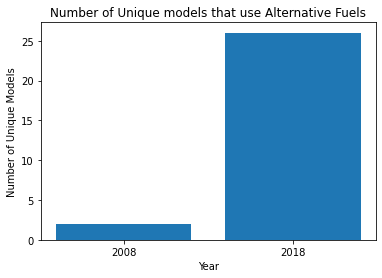

In [108]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title('Number of Unique models that use Alternative Fuels')
plt.xlabel('Year')
plt.ylabel('Number of Unique Models');

##### Since 2008, the number of unique models using alternative sources of fule increased by 24

##### Check the proportions of the unique models that used alternative fuels in both years

In [109]:
total_08_models = df_08.model.nunique()
total_18_models = df_18.model.nunique()

total_08_models, total_18_models

(377, 357)

In [110]:
prop_08_uniq_mod = alt_08/total_08_models
prop_18_uniq_mod = alt_18/total_18_models

prop_08_uniq_mod, prop_18_uniq_mod

(0.005305039787798408, 0.07282913165266107)

Text(0, 0.5, 'Proportion of Unique models')

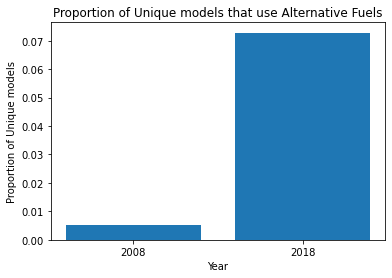

In [111]:
plt.bar(['2008','2018'], [prop_08_uniq_mod, prop_18_uniq_mod])
plt.title('Proportion of Unique models that use Alternative Fuels')
plt.xlabel('Year')
plt.ylabel('Proportion of Unique models')

### Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?

Let's look at the average fuel economy for each vehicle class for both years.

In [112]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [113]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [114]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

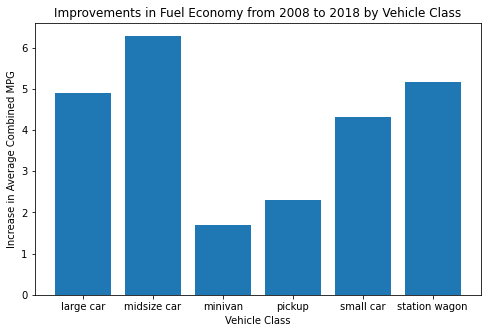

In [116]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [117]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [118]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [119]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [120]:
# smartway labels for 2018
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [121]:
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [122]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?

You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [123]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [124]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000
